ah yes.... the infamous iris species project thingy

# EDA! E! D! A!

In [99]:
# how do I load a dataset? LOL 

# maybe let's start with actually looking at the csv file lines... 

import torch
import pandas as pd

csv_path = 'Iris.csv'
df = pd.read_csv(csv_path)

let's take a look at the data set - shape property shows # lines, rows

In [100]:
# let's take a look at the data set
print(df.head(10))
print(df.shape) # (150 lines, 6 rows) - oh that's cool, shape property.

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
(150, 6)


In [101]:
# just learned about DESCRIBE WOW 

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


want to find:
- species categories, 
- the average, min/max, of sepal and petal

unique number of species:

In [102]:
# want to find:
#   species categories, 
#   the average, min/max, of sepal and petal

# unique number of species -- 
print(df['Species'].unique())
print(df['Species'].nunique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3


In [103]:
# want to see: 
# iris-setosa: average, min/max, 
# etc. 

# groupby omg, i forgot about groupby. 

print(df.groupby('Species')['SepalLengthCm'].mean())

Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64


In [104]:
print(df.groupby('Species').mean())

                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


In [105]:
print(df.groupby('Species').max())

                  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                       
Iris-setosa       50            5.8           4.4            1.9           0.6
Iris-versicolor  100            7.0           3.4            5.1           1.8
Iris-virginica   150            7.9           3.8            6.9           2.5


In [106]:
print(df.groupby('Species').min())

                  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                       
Iris-setosa        1            4.3           2.3            1.0           0.1
Iris-versicolor   51            4.9           2.0            3.0           1.0
Iris-virginica   101            4.9           2.2            4.5           1.4


In [107]:
print(df.groupby('Species').count())

                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                      
Iris-setosa      50             50            50             50            50
Iris-versicolor  50             50            50             50            50
Iris-virginica   50             50            50             50            50


In [108]:
df.groupby('Species').describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm         ... PetalLengthCm      PetalWidthCm  \
                        count   mean  ...           75%  max        count   
Species                               ...                                   
Iris-setosa              50.0  5.006  ...         1.575  1.9         50.0   
Iris-versicolor          50.0  5.936  ...         4.600  5.1         50.0   
Iris-virginica           50.0  6.588  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

Let's look at Sepal data

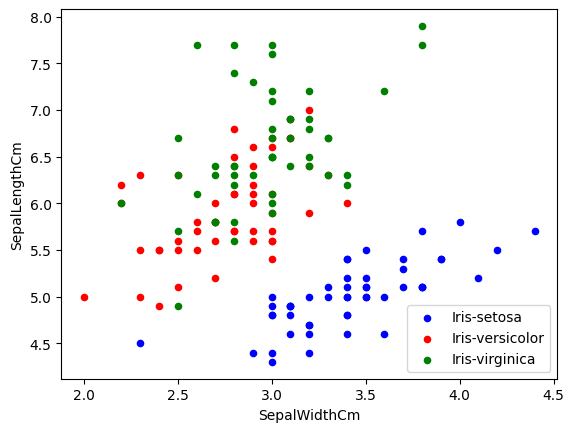

In [109]:
# now i want to plot each of the data on a chart, with different colours. 

ax = df[df['Species'] == 'Iris-setosa'].plot.scatter(x='SepalWidthCm', y='SepalLengthCm', color='Blue', label='Iris-setosa')
bx = df[df['Species'] == 'Iris-versicolor'].plot.scatter(x='SepalWidthCm', y='SepalLengthCm', color='Red', label='Iris-versicolor', ax=ax)
cx = df[df['Species'] == 'Iris-virginica'].plot.scatter(x='SepalWidthCm', y='SepalLengthCm', color='Green', label='Iris-virginica', ax=bx)

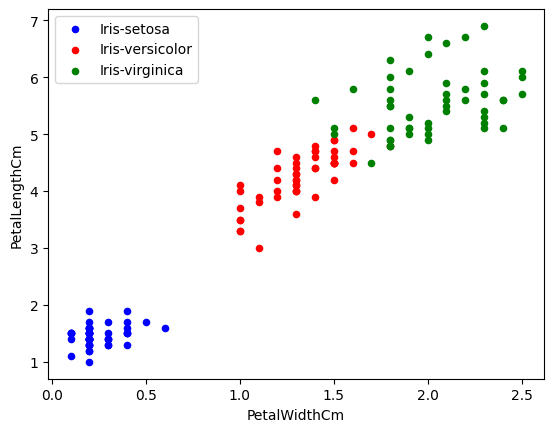

In [110]:
# now i want to plot each of the data on a chart, with different colours. 

ax = df[df['Species'] == 'Iris-setosa'].plot.scatter(x='PetalWidthCm', y='PetalLengthCm', color='Blue', label='Iris-setosa')
bx = df[df['Species'] == 'Iris-versicolor'].plot.scatter(x='PetalWidthCm', y='PetalLengthCm', color='Red', label='Iris-versicolor', ax=ax)
cx = df[df['Species'] == 'Iris-virginica'].plot.scatter(x='PetalWidthCm', y='PetalLengthCm', color='Green', label='Iris-virginica', ax=bx)

# training?!

can we put a model that predicts what flower it is based on all 4 attributes? 
visually, we can see lol, that there's some pattern.

- need to train on 90% of the data, test on 10% 
- also, need to sample randomly. 
- so this is: supervised learning (since we know what's the "outputs")

what do I pick? 
- classification vs. regression
- here i am looking to CLASSIFY (into one of 3 categories, discrete)
- whereas otherwise if it's a numerical / continuous number, that would be REGRESSION. 

so within classification I could pick: 
- logistic regression, support vector machines (SVM), decision trees, random forests, naive bayes 

and then we can measure the "best method" using....? well, not exactly loss is it?:
- binary cross-entropy loss / log loss 
- categorical cross-entropy loss
- hinge loss 
- log loss

In [111]:
# let's sample randomly for 90% of training and test data 

# can use dataframe's sample() and then drop those: 
# 
# train_set = df.sample(frac=0.8, random_state=42)
# test_set = df.drop(train_set.index)

# BUT best to use sklearn method.... 
# pip install scikit-learn tho, but the shortened is sklearn. 

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2)
# random_state is shuffling, popular random seeds is 0, 42 (haha, answer to universe)
print(train_set.shape)
print(test_set.shape)


(120, 6)
(30, 6)


# random forest
- a set of decision trees. a decision tree picks specific features to split on...
- going to follow: https://www.datacamp.com/tutorial/random-forests-classifier-python 

In [112]:
# so for random forest, we need to split our features and our output
# omfg, it was giving me perfect predictions based on id... it was in order.

X = df.drop(labels=['Species', 'Id'], axis=1) # axis 1 is column
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# now we can run the model: 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# can see accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 

Accuracy: 0.9


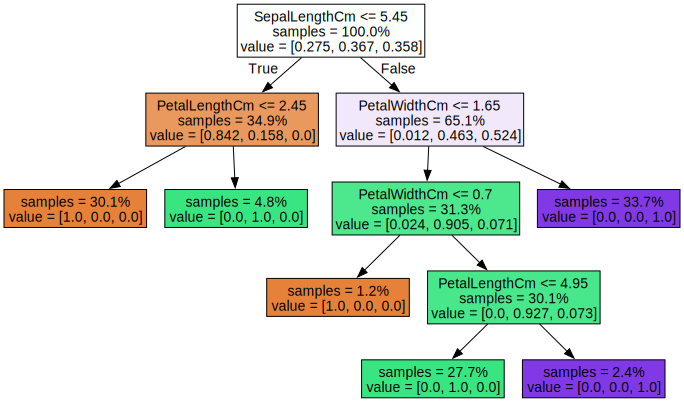

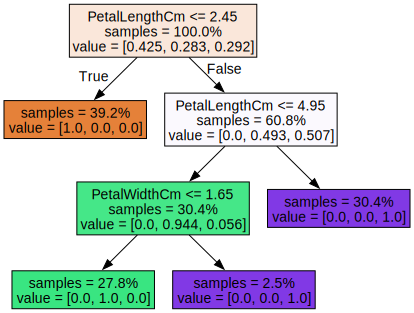

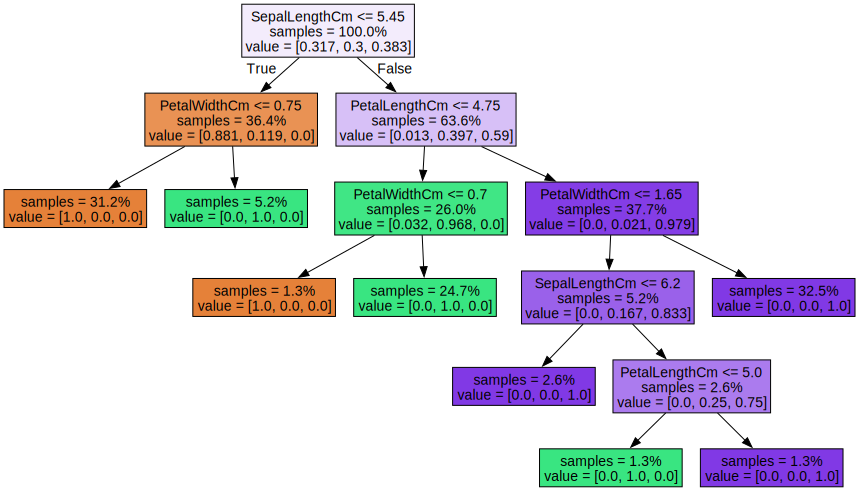

In [113]:
# let's see the first 3 trees: 

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                            #    max_depth=4, # let's see the max depth
                               impurity=False, # aka Gini index - entropy. 100% pure is all in 1 node, 100% impure is 50.50 node spoit
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

wow... it really does seem random which ones they decide... this is the default function https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html 

random max depth of the trees, and random number of trees too.

In [114]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# we're going to increase to have AT LEAST 50 trees, which would be more computation but more accurate BECAUSE we pick best tree

param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}

rf2 = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf2, param_distributions = param_dist, n_iter = 5, cv = 5)
rand_search.fit(X_train, y_train)

# RandomizedSearchCV will train many models 5 times, and save the best model

# This function also uses cross validation,
# which means it splits the data into five equal-sized groups and uses 4 to train and 1 to test the result. 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1616fa690>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x161729d10>})

In [115]:
# best models: 

best_rf = rand_search.best_estimator_
print('best hyperparmeters:', rand_search.best_params_)


best hyperparmeters: {'max_depth': 11, 'n_estimators': 180}


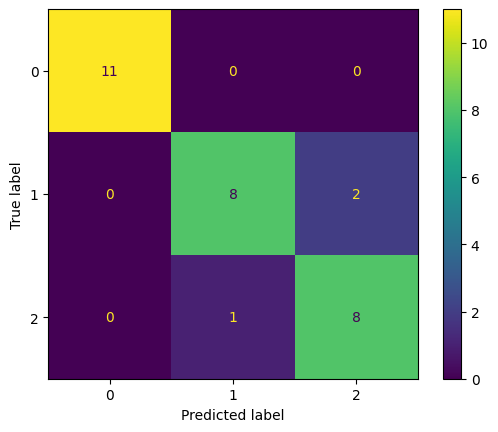

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# ok bet, let's generate predictions 
# and we can use something called a CONFUSION MATRIX (shows false positiges and false negatives)
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_amt = accuracy_score(y_test, y_pred)
precision_amt = precision_score(y_test, y_pred)
recall_amt = recall_score(y_test, y_pred)

print("Accuracy:", accuracy_amt)
print("Precision:", precision_amt)
print("Recall:", recall_amt)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

<Axes: >

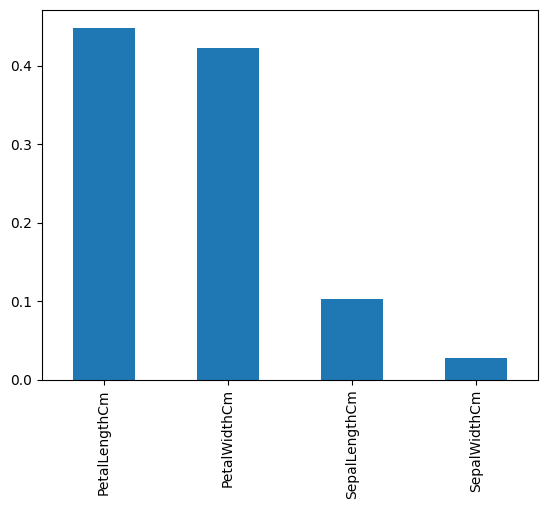

In [74]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()

# Naive Bayes

- conditional independence, the variables are not affecting one another at all.

main formula: 
- P(h|D) = probability of hypothesis, given data
- P(h) = probability of hypothesis 
- P(D) = probability of data 
- P(D|h) = probability of data given h is true. 

P(h|D) = P(D|h) * P(h) / P(D)

- let's watch this: https://youtu.be/HZGCoVF3YvM?si=4yadMAt_DZUeTkla 

0.9666666666666667


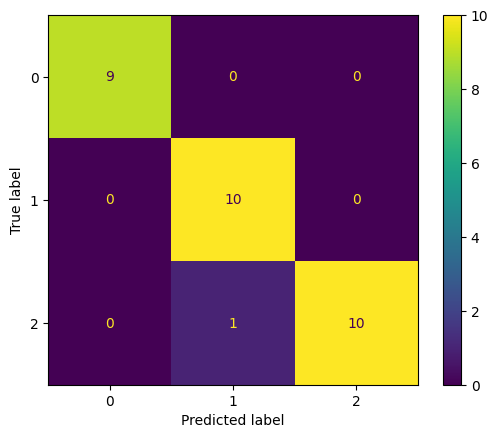

In [97]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train);

y_pred_gaussian = model.predict(X_test)
accuracy = accuracy_score(y_pred_gaussian, y_test)
print(accuracy)

cm = confusion_matrix(y_pred_gaussian, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# SVM 
- watching this video - https://youtu.be/_YPScrckx28?si=D4g4c2IPcPDJCBLd
### PROS:
- finds the best hyperplane ("line") that splits the dataset and does prediction
- the ones closest to the line are the support vectors, and margin
    - **BIGGEST MARGINS**
- best - equally distanced from the points in the category 

### CONS:
- might not be linearly split, perhaps use functions to "project onto higher dimensions"
- in order to separate, then "project down" (eg. flatten)

## Kernesl:
what is kernel trick? allows to handle nonlinear: https://youtu.be/Q7vT0--5VII?si=9KzEaSl-W5RbJgao 
    eg. `SVC(kernel='poly').fit(X, y)`
math: 
- https://youtu.be/OKFMZQyDROI?si=D79eOBLmUa3pItkx
- https://youtu.be/6-ntMIaJpm0?si=QTza8kKw-L2KozYg

In [121]:
from sklearn import svm 

# ok, but how do we pick a kernel tho? I guess we need to try all of them. hahahaha 
# linear, poly, etc. etc.? 

linear_classifier = svm.SVC(kernel='linear')
linear_classifier.fit(X_train, y_train)
y_pred_svm_lin = linear_classifier.predict(X_test)

print(accuracy_score(y_pred_svm_lin, y_test)) # ok, 0.9333 looks more like it. 
print(y_pred_svm_lin[0:5])
print(y_test[0:5])

# apparently 96.49% is good according to datacamp 

0.9333333333333333
['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica']
83     Iris-versicolor
70     Iris-versicolor
63     Iris-versicolor
39         Iris-setosa
106     Iris-virginica
Name: Species, dtype: object


In [122]:
poly_classifier = svm.SVC(kernel='poly')
poly_classifier.fit(X_train, y_train)
y_pred_svm_poly = poly_classifier.predict(X_test)
print(accuracy_score(y_pred_svm_poly, y_test)) 

0.9333333333333333
